# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [128]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [129]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [130]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

In [131]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
to_data_2 = (to_data[["single_detached_house", 
                      "apartment_five_storeys_plus", 
                      "movable_dwelling", 
                      "semi_detached_house", 
                      "row_house", 
                      "duplex", 
                      "apartment_five_storeys_less", 
                      "other_house"]].groupby("year").sum())
to_data_2

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [132]:
# Save the dataframe as a csv file
to_data_2.to_csv("to_data_2")

In [133]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):  
    dwelling_type_per_year = px.bar(
        data = to_data_2, 
        title = "Dwelling Types in TO", 
        xlabel = "Dwelling Type", 
        ylabel = "Dwelling Type Units", 
        color = "year",
        width = 100,
    )
    return dwelling_type_per_year


    """
    Create a barplot based in the data argument.
    """
    


In [134]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
dt_2001 = to_data_2.loc[2001]
plot_dt_2001 = dt_2001.hvplot.bar(xlabel = "Dwelling Type", ylabel = "Amount", title = "Dwelling Types 2001", rot = 90, height =500)

# Bar chart for 2006
dt_2006 = to_data_2.loc[2006]
plot_dt_2006 = dt_2006.hvplot.bar(xlabel = "Dwelling Type", ylabel = "Amount", title = "Dwelling Types 2006", rot = 90, height =500)

# Bar chart for 2011
dt_2011 = to_data_2.loc[2011]
plot_dt_2011 = dt_2011.hvplot.bar(xlabel = "Dwelling Type", ylabel = "Amount", title = "Dwelling Types 2011", rot = 90, height =500)
# Bar chart for 2016
dt_2016 = to_data_2.loc[2016]
plot_dt_2016 = dt_2011.hvplot.bar(xlabel = "Dwelling Type", ylabel = "Amount", title = "Dwelling Types 2016", rot = 90, height =500)

plot_dt_2001 + plot_dt_2006 + plot_dt_2011 + plot_dt_2016

:Layout
   .Bars.A_2001    :Bars   [index]   (2001)
   .Bars.A_2006    :Bars   [index]   (2006)
   .Bars.A_2011.I  :Bars   [index]   (2011)
   .Bars.A_2011.II :Bars   [index]   (2011)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [135]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs_rented = (to_data[["shelter_costs_rented"]].groupby("year").sum())
shelter_costs_rented

shelter_costs_owned = (to_data["shelter_costs_owned"].groupby("year").sum())
shelter_costs_owned

year
2001    118563
2006    184352
2011    202750
2016    246584
Name: shelter_costs_owned, dtype: int64

In [136]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """

In [137]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
plot_shelter_costs_rented = shelter_costs_rented.hvplot(label="Average Monthly Shelter Cost for Rented Dwellings in TO", rot=90).opts(
    yformatter="%.0f")

# Line chart for rented dwellings
plot_shelter_costs_owned = shelter_costs_owned.hvplot(label="Average Monthly Shelter Cost for Owned Dwellings in TO", rot=90).opts(
    yformatter="%.0f").opts(line_color='red')
plot_shelter_costs_owned + plot_shelter_costs_rented

:Layout
   .Curve.Average_Monthly_Shelter_Cost_for_Owned_Dwellings_in_TO  :Curve   [year]   (shelter_costs_owned)
   .Curve.Average_Monthly_Shelter_Cost_for_Rented_Dwellings_in_TO :Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [138]:
# Calculate the average house value per year
average_house_value = to_data["average_house_value"].groupby("year").sum()
average_house_value

year
2001    40583604
2006    59368353
2011    74259461
2016    92969566
Name: average_house_value, dtype: int64

In [139]:
# Plot the average house value per year as a line chart
plot_average_house_value = average_house_value.hvplot(label="Average House Value in TO", rot=90).opts(
    yformatter="%.0f").opts(line_color='red')
plot_average_house_value

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [140]:
# Create a new DataFrame with the mean house values by neighbourhood per year
from panel.interact import interact


file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data_3 = pd.read_csv(file_path, header = 0)
avg_house_value = to_data_3[['year', 'neighbourhood', 'average_house_value']]
avg_house_value.head(10)

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [141]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

plot_avg_house_value_by_neighbourhood = avg_house_value.hvplot.line(
    label="Avg Value by Neighbourhood", 
    groupby = "neighbourhood",
    x = "year",
    y = "average_house_value").opts(yformatter="%.0f")
plot_avg_house_value_by_neighbourhood


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [142]:
# Fetch the data of all dwelling types per year
to_data_3.head(5)

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [143]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
plot_dwelling_types_per_year = to_data_3.hvplot.bar(xlabel = "year", ylabel = "Dwelling type units").opts(yformatter="%.0f")
plot_dwelling_types_per_year

:Bars   [index,Variable]   (value)

- - - 

Top 10 Most Expensive Neighbourhoods## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [144]:
# Getting the data from the top 10 expensive neighbourhoods
top_10 = to_data_3[["neighbourhood", "average_house_value"]].sort_values("average_house_value").head(10)
top_10.head(10)

,neighbourhood,average_house_value
42,Flemingdon Park,126255
115,Taylor-Massey,145464
81,Mount Olive-Silverstone-Jamestown,153829
118,Thorncliffe Park,155094
73,Malvern,156076
13,Black Creek,158483
31,Dorset Park,159187
80,Mount Dennis,159374
38,Elms-Old Rexdale,163039
37,Eglinton East,163419


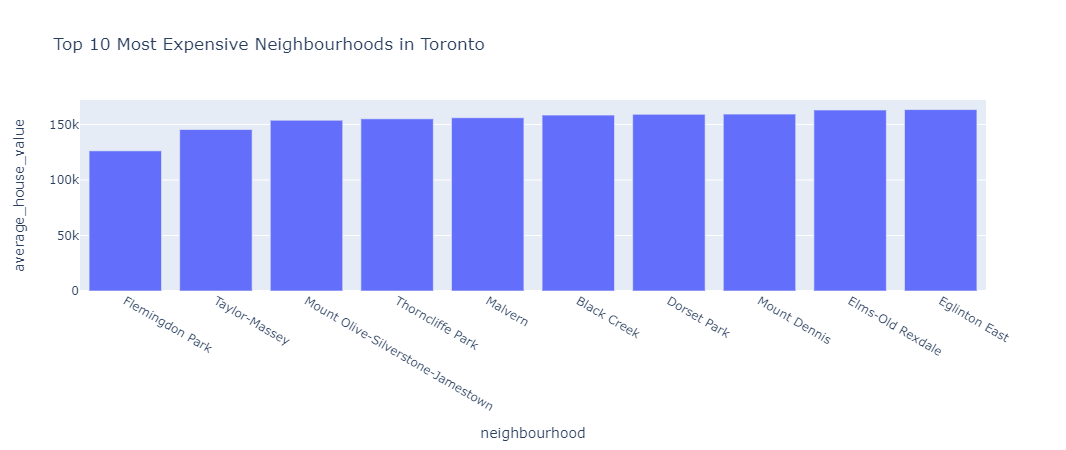

In [145]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_plot = px.bar(
    top_10,
    x="neighbourhood",
    y="average_house_value",
    title="Top 10 Most Expensive Neighbourhoods in Toronto",
)

top_10_plot

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [146]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()


,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [147]:
# Calculate the mean values for each neighborhood
to_data_4 = to_data_3[['neighbourhood',
                       'single_detached_house', 
                       'apartment_five_storeys_plus', 
                       'movable_dwelling', 
                       'semi_detached_house', 
                       'row_house', 'duplex', 
                       'apartment_five_storeys_less', 
                       'other_house', 
                       'average_house_value', 
                       'shelter_costs_owned', 
                       'shelter_costs_rented']]

to_data_4.head(4)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378


In [148]:
# Join the average values with the neighbourhood locations
data_complete = pd.concat([df_neighbourhood_locations, to_data_4,], axis = 1).dropna()
data_complete.head(5)

,neighbourhood,lat,lon,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,Agincourt South-Malvern West,43.788658,-79.265612,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,Alderwood,43.604937,-79.541611,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,Annex,43.671585,-79.404001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,Banbury-Don Mills,43.737657,-79.349718,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [127]:
map_1 = px.scatter_mapbox(
    data_complete,
    lat="lat",
    lon="lon",
    color="average_house_value",
)
map_1.show()

In [260]:
map_1=px.scatter_mapbox(
    data_complete, 
    lat="lat", 
    lon="lon", 
    color="average_house_value"
)
map_1.show()

In [225]:
# Create a scatter mapbox to analyze neighbourhood info
map_1 = px.scatter_mapbox(
    data_complete,
    lat="lat",
    lon="lon",
    color= "average_house_value"
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [149]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [150]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [151]:
# Create the sunburst chart
# YOUR CODE HERE!